This notebook illustrates the [TubeTK](http://tubetk.org) tube NumPy array data structure and how to create histograms of the properties of a [VesselTube](https://www.itk.org/Doxygen/html/classitk_1_1VesselTubeSpatialObject.html).

First, import the function for reading a tube file in as a NumPy array, and read in the file.

In [1]:
import os
import sys

In [5]:
from itk import tubes_from_file

tubes = tubes_from_file("data/Normal071-VascularNetwork.tre")

ImportError: cannot import name 'tubes_from_file' from 'itk' (unknown location)

The result is a [NumPy Record Array](https://docs.scipy.org/doc/numpy/user/basics.rec.html) where the fields of the array correspond to the properties of a [VesselTubeSpatialObjectPoint](https://www.itk.org/Doxygen/html/classitk_1_1VesselTubeSpatialObjectPoint.html).

In [3]:
print(type(tubes))
print(tubes.dtype)

<class 'numpy.ndarray'>
[('Id', '<i4'), ('PositionInWorldSpace', '<f8', (3,)), ('Color', '<f4', (4,)), ('TangentInWorldSpace', '<f8', (3,)), ('Normal1InWorldSpace', '<f8', (3,)), ('Normal2InWorldSpace', '<f8', (3,)), ('RadiusInWorldSpace', '<f4'), ('Alpha1', '<f4'), ('Alpha2', '<f4'), ('Alpha3', '<f4'), ('Medialness', '<f4'), ('Ridgeness', '<f4'), ('Branchness', '<f4')]


The length of the array corresponds to the number of points that make up the tubes.

In [4]:
print(len(tubes))
print(tubes.shape)

106061
(106061,)


Individual points can be sliced, or views can be created on individual fields.

In [5]:
print('Entire points 0, 2:')
print(tubes[:4:2])

print('\nPosition of points 0, 2')
print(tubes['PositionInWorldSpace'][:4:2])

Entire points 0, 2:
[(-1, [121.26599451,  94.40424276,   0.30700558], [1., 0., 0., 1.], [0.82861531, 0.52673039, 0.18960951], [ 0.55138761, -0.70933917, -0.43910095], [ 0.09679036, -0.46839411,  0.87820191], 1.277065, 0., 0., 0., 0., 0., 0.)
 (-1, [121.33222107,  94.44634136,   0.32216   ], [1., 0., 0., 1.], [0.85344853, 0.48634417, 0.18733647], [-0.50062039,  0.86495203,  0.03517395], [ 0.14493042,  0.12380361, -0.98166585], 1.277065, 0., 0., 0., 0., 0., 0.)]

Position of points 0, 2
[[121.26599451  94.40424276   0.30700558]
 [121.33222107  94.44634136   0.32216   ]]


We can easily create a histogram of the radii or visualize the point positions.

Populating the interactive namespace from numpy and matplotlib


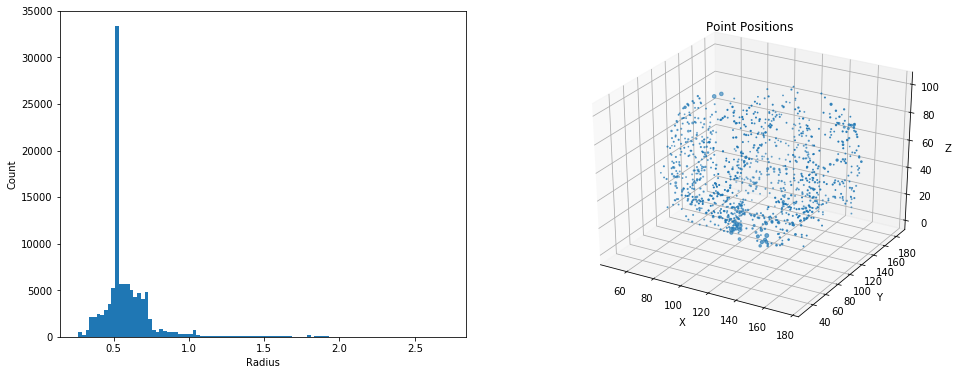

In [6]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 2, 1)
ax.hist(tubes['RadiusInWorldSpace'], bins=100)
ax.set_xlabel('Radius')
ax.set_ylabel('Count')

ax = fig.add_subplot(1, 2, 2, projection='3d')
subsample = 100
position = tubes['PositionInWorldSpace'][::subsample]
radius = tubes['RadiusInWorldSpace'][::subsample]
ax.scatter(position[:,0], position[:,1], position[:,2], s=(2*radius)**2)
ax.set_title('Point Positions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');